# **Tomato Plant Disease Prediction**

### To mount Mydrive

In [ ]:
# Mount google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Defining Train, Validation and Test directory

In [ ]:
train_path = '/content/drive/My Drive/plant_disease/train'
valid_path = '/content/drive/My Drive/plant_disease/valid'
test_path = '/content/drive/My Drive/plant_disease/test'

### All required libraries

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Transfer Learing with InceptionV3 model

In [ ]:
inception = InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')
len(inception.layers)

NameError: ignored

In [ ]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
len(inception.layers)

311

In [ ]:
# Seting all layers as non trainable
for i in inception.layers:
  i.trainable = False

In [ ]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
len(inception.layers)

311

In [ ]:
# Adding 2 more layers for disease prediction with 5 classes
x = tf.keras.layers.Flatten()(inception.output)
prediction = Dense(5,activation='softmax')(x)

In [ ]:
# Combining the inception model layers wiht above layers
model = Model(inputs=inception.input,outputs=prediction)

In [ ]:
len(model.layers)

313

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Plotting the Model

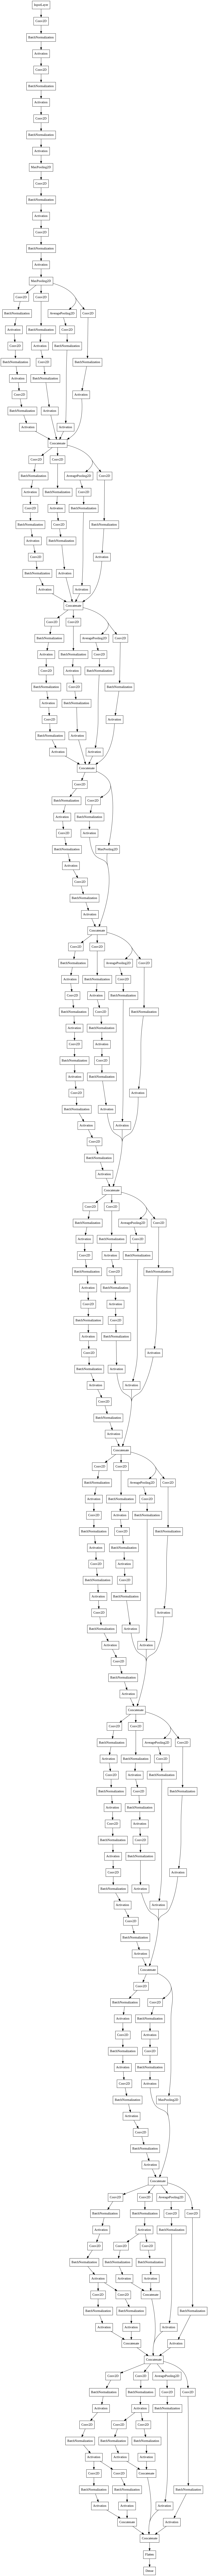

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, "PlantDoc Model.png", show_layer_names=False)

#3 **Data Preprocessing and labeling using Keras ImageDataGenerator**

### **Data Augmentation to avoid Overfitting and for better accuracy**

In [ ]:
# This data contains 5 classes
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
train_batches = train_gen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
valid_gen = ImageDataGenerator(rescale=1./255)
valid_batches = valid_gen.flow_from_directory(valid_path,target_size=(224,224),batch_size=32,class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_batches = test_gen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

In [ ]:
# Model Compilation with "Adam" optimizer
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model for 30 epochs
model.fit(train_batches,steps_per_epoch=len(train_batches),
                    validation_data=test_batches,validation_steps=len(test_batches),
                    epochs=30)

In [ ]:
model.save_weights('inceptionv3_plant_weights.h5')

In [ ]:
# Saving the model for later use
model.save('/content/drive/My Drive/plant_disease/inceptionv3_model(01).h5')

In [ ]:
# Evaluating the model on test images 
loss,accuracy = model.evaluate(valid_batches,verbose=0)
print("Loss: ",loss)
print("Accuracy: ",accuracy*100,'%')

## Let's test our Model

In [ ]:
# Reloading the saved model
r = tf.keras.models.load_model('/content/drive/MyDrive/Ml Projects/plant disease model/inceptionv3_model(01).h5')

In [ ]:
# All 5 classes
s = {0:'Early Blight Disease',1:'Healthy Plant',2:'Late Blight Disease',3:'Septorial Diseased Plant',
     4:'Yellow Leaf Curl Virus'}

In [ ]:
# Function to preprocess the Image for predction
def img_predict():
  img_file = files.upload()
  for i in img_file.keys():
    path = i
    img = load_img(path,target_size=(224,224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img,axis=0)
    pred = np.argmax(r.predict(img))
    print("\n")
    print(s[pred])


## Try the prediciton for your own image by calling the function img_predict(). Upload the img you wanna predict

In [ ]:
img_predict()

In [ ]:
img_predict()

#                          **Thank You** 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
base_model = EfficientNetB0(input_shape=(224,224,3), include_top=False, weights='imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
# Creating the model

def build_Model(num_classes, base_model):
  x = base_model.output

  x = layers.Flatten()(x)

  prediction = layers.Dense(num_classes, activation='softmax')(x)
  
  model = Model(inputs=base_model.input, outputs=prediction)

  # Compiling the model
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

  return model

PlantNet = build_Model(5, base_model)

In [ ]:
train_dir = "/content/drive/MyDrive/Ml Projects/plant_disease/train"
test_dir = "/content/drive/MyDrive/Ml Projects/plant_disease/test"
valid_dir = "/content/drive/MyDrive/Ml Projects/plant_disease/valid"

# Data Augmentation
# Trainin Data
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(224,224),batch_size=64, class_mode='categorical')

test_data = test_gen.flow_from_directory(test_dir, target_size=(224,224),batch_size=64, class_mode='categorical')

valid_data = test_gen.flow_from_directory(valid_dir, target_size=(224,224),batch_size=64, class_mode='categorical')

# Training the model
EPOCHS = 30
hist = PlantNet.fit(train_data,
                    validation_data = valid_data,
                    epochs=EPOCHS)

Found 2000 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 400 images belonging to 5 classes.
Epoch 1/30
32/32 [==============================] - 738s 23s/step - loss: 1.7410 - accuracy: 0.2025 - val_loss: 1.6998 - val_accuracy: 0.2000
Epoch 2/30
32/32 [==============================] - 123s 4s/step - loss: 1.6610 - accuracy: 0.1915 - val_loss: 1.6116 - val_accuracy: 0.2400
Epoch 3/30
32/32 [==============================] - 122s 4s/step - loss: 1.6681 - accuracy: 0.2030 - val_loss: 1.6459 - val_accuracy: 0.2000
Epoch 4/30
32/32 [==============================] - 121s 4s/step - loss: 1.6659 - accuracy: 0.2090 - val_loss: 1.6504 - val_accuracy: 0.2000
Epoch 5/30
32/32 [==============================] - 120s 4s/step - loss: 1.6837 - accuracy: 0.2050 - val_loss: 1.6676 - val_accuracy: 0.2000
Epoch 6/30
32/32 [==============================] - 121s 4s/step - loss: 1.6585 - accuracy: 0.2115 - val_loss: 1.6374 - val_accuracy: 0.2000
Epoch 7/30
32/32 [===========